In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./data/assignments/assignments-202211.csv')
df.head()

,id,loaded_distance,appt_date,appt_time,client_id,driver_id,origin_lat,origin_lng,destination_lat,destination_lng,program_name
0,716463,22.4 mi,2022-11-01,15:00,4844,14,44.22,-75.80,43.96,-75.91,STP
1,716464,9.0 mi,2022-11-01,20:00,7874,345,43.97,-75.93,44.08,-75.93,SRVC
2,716465,42.0 mi,2022-11-01,13:00,16123,163,43.61,-75.36,43.98,-75.92,SRVC
3,716466,17.4 mi,2022-11-01,09:30,9853,1124,44.15,-75.71,43.98,-75.92,SRVC
4,716467,17.4 mi,2022-11-01,09:30,15320,1124,44.15,-75.71,43.98,-75.92,SRVC


In [6]:
df.shape

(15879, 11)

In [4]:
# Take only 10% percent of the data first
# df = df[:len(df)//10]
# df.shape

(1587, 11)

In [7]:
# Formatting loaded_distance
df.loaded_distance = df.loaded_distance.apply(lambda x: x.replace(' mi', '')).astype(float)
df.head()

,id,loaded_distance,appt_date,appt_time,client_id,driver_id,origin_lat,origin_lng,destination_lat,destination_lng,program_name
0,716463,22.4,2022-11-01,15:00,4844,14,44.22,-75.80,43.96,-75.91,STP
1,716464,9.0,2022-11-01,20:00,7874,345,43.97,-75.93,44.08,-75.93,SRVC
2,716465,42.0,2022-11-01,13:00,16123,163,43.61,-75.36,43.98,-75.92,SRVC
3,716466,17.4,2022-11-01,09:30,9853,1124,44.15,-75.71,43.98,-75.92,SRVC
4,716467,17.4,2022-11-01,09:30,15320,1124,44.15,-75.71,43.98,-75.92,SRVC


In [8]:
# We find that there are some loaded_distance whose values are over 1000 mi.
df.sort_values('loaded_distance')

,id,loaded_distance,appt_date,appt_time,client_id,driver_id,origin_lat,origin_lng,destination_lat,destination_lng,program_name
2253,718738,0.0,2022-11-04,15:00,16453,1135,43.46,-76.23,43.46,-76.23,OSWEGO
15207,731829,0.0,2022-11-30,10:00,16453,788,43.46,-76.23,43.46,-76.23,OSWEGO
1734,718219,0.0,2022-11-03,09:00,16453,723,43.46,-76.23,43.46,-76.23,OSWEGO
7725,724248,0.0,2022-11-15,09:00,16453,723,43.46,-76.23,43.46,-76.23,OSWEGO
1735,718220,0.0,2022-11-03,10:30,16453,723,43.46,-76.23,43.46,-76.23,OSWEGO
...,...,...,...,...,...,...,...,...,...,...,...
11494,728086,1274.1,2022-11-21,14:00,5159,31,43.97,-75.88,32.73,-89.55,PW
3761,720249,1362.1,2022-11-06,ASAP,18804,1179,43.99,-75.59,44.89,-97.12,CAH
12169,728763,1433.1,2022-11-22,10:00,18012,281,44.34,-75.47,44.17,-97.72,OTP
4339,720838,2645.1,2022-11-08,16:15,1751,1124,43.12,-76.16,47.75,-120.74,OTP


<AxesSubplot: ylabel='Frequency'>

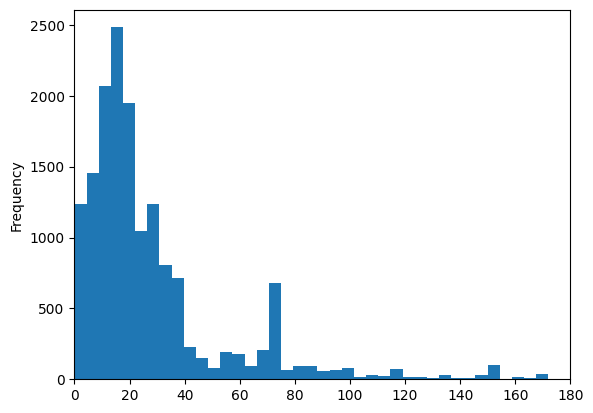

In [13]:
# distribution of loaded_distance
df.loaded_distance.plot(kind='hist', bins=600, xlim=(0, 180), xlabel='Loaded Distance', ylabel='Count of trips')

<AxesSubplot: >

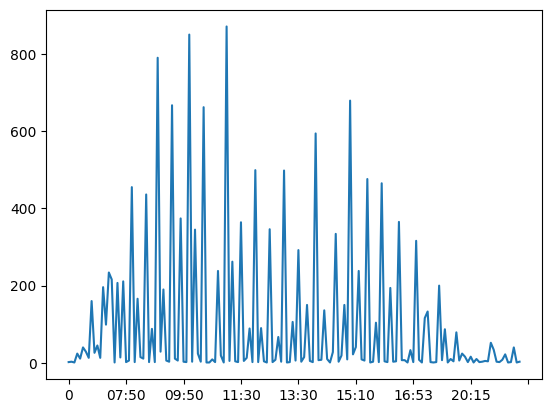

In [20]:
# Number of rides in a single day
df.appt_time.value_counts().sort_index().plot()

In [21]:
# There are some appt_time not in the correct format
df[df.appt_time.str.split(':').apply(lambda x: len(x)) != 2]

,id,loaded_distance,appt_date,appt_time,client_id,driver_id,origin_lat,origin_lng,destination_lat,destination_lng,program_name
46,716514,2.2,2022-11-01,AM,4919,345,44.02,-75.84,44.04,-75.84,STP
531,717002,73.4,2022-11-01,0,1003,730,43.06,-76.10,43.97,-75.90,FMCD
615,717086,2.1,2022-11-01,AM,4919,345,44.04,-75.84,44.02,-75.84,STP
819,717294,13.0,2022-11-02,PM,740,49,44.67,-74.80,44.66,-75.03,SOTP
831,717308,2.1,2022-11-02,AM,3654,872,44.59,-75.17,44.60,-75.14,SOTP
...,...,...,...,...,...,...,...,...,...,...,...
14988,731605,14.5,2022-11-29,PM,9127,804,44.92,-74.88,44.75,-74.99,SOTP
15753,732376,1.1,2022-11-23,ASAP,18958,302,43.99,-75.59,43.98,-75.60,CAH
15766,732389,1.9,2022-11-23,AM/PM,262,820,44.67,-74.97,44.69,-74.99,SOTP
15767,732390,1.9,2022-11-23,AM/PM,262,820,44.69,-74.99,44.67,-74.97,SOTP


In [22]:
# Filter out the row whose appt_time is not in standard format
df_time = df[df.appt_time.str.split(':').apply(lambda x: len(x)) == 2]
# xgboost

In [23]:
def cut_time(time):
    if len(time.split(':')) != 2:
        return 'other'
    if '00:00' <= time < '03:00':
        return '00:00 - 03:00'
    if '03:00' <= time < '06:00':
        return '03:00 - 06:00'
    if '06:00' <= time < '09:00':
        return '06:00 - 09:00'
    if '09:00' <= time < '12:00':
        return '09:00 - 12:00'
    if '12:00' <= time < '15:00':
        return '12:00 - 15:00'
    if '15:00' <= time < '18:00':
        return '15:00 - 18:00'
    if '18:00' <= time < '21:00':
        return '18:00 - 21:00'
    if '21:00' <= time < '24:00':
        return '21:00 - 00:00'
df['time_interval'] = df.appt_time.astype(str).apply(cut_time)

<AxesSubplot: xlabel='Time within a day', ylabel='Counts of rides'>

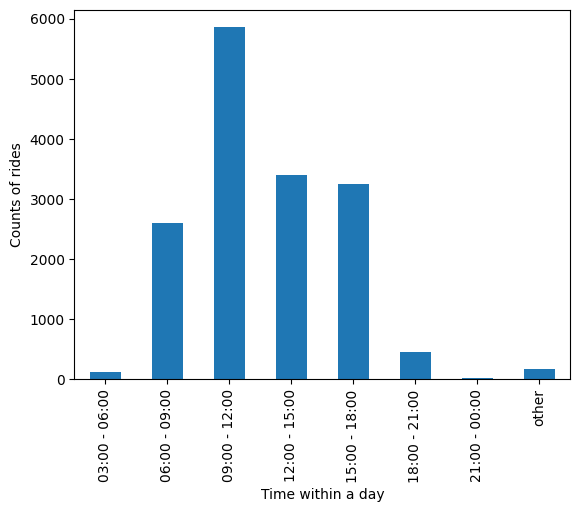

In [24]:
df.time_interval.value_counts().sort_index().plot(kind='bar', xlabel='Time within a day', ylabel='Counts of rides')

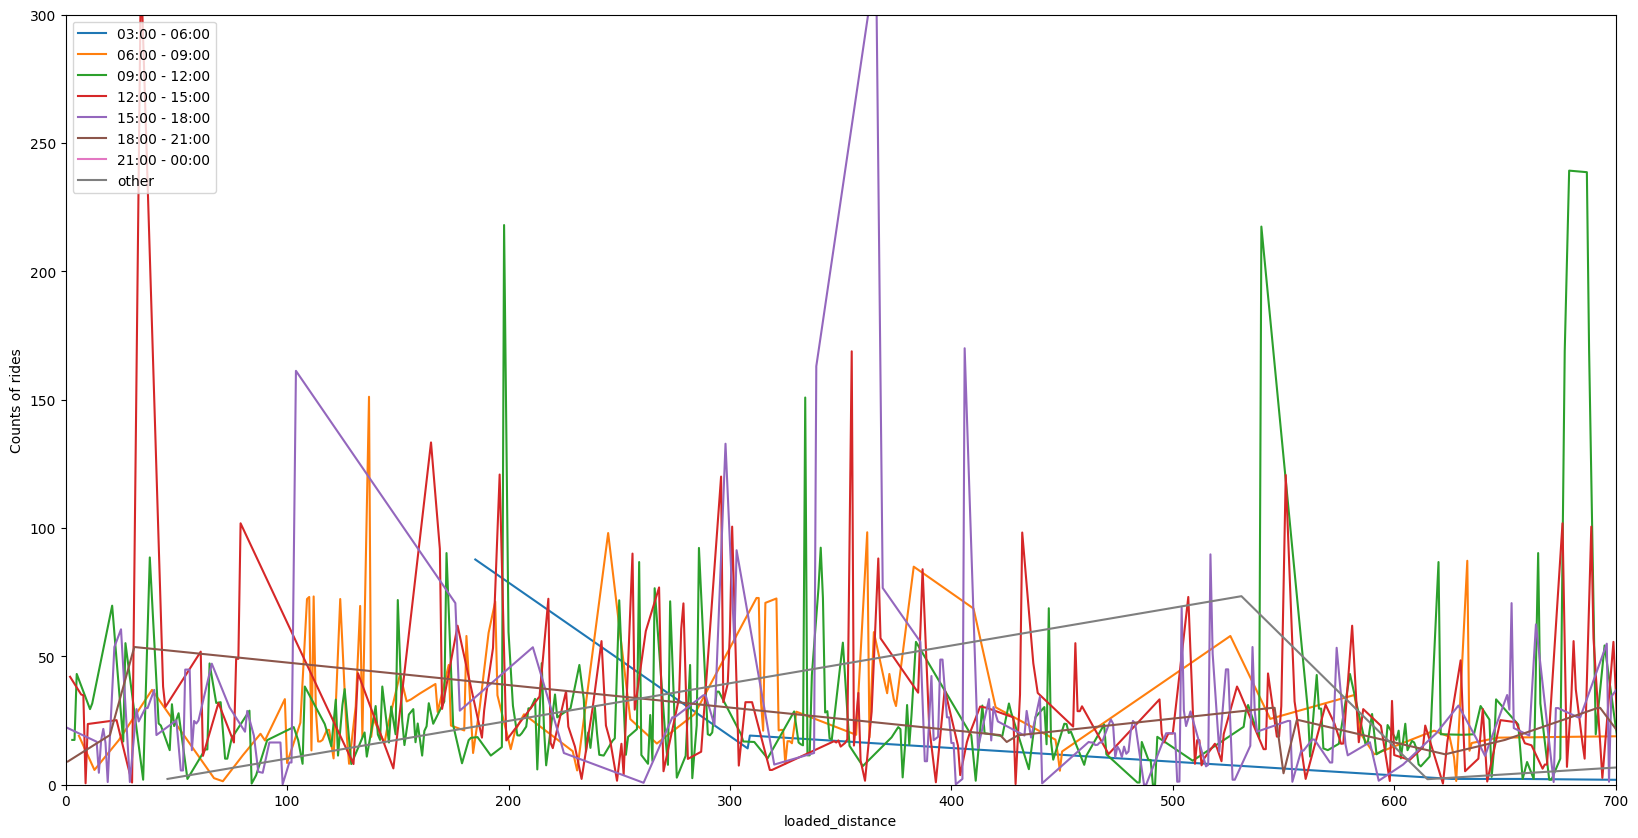

In [28]:
# Distribution of loaded_distance according to time interval of a day
df.groupby('time_interval')['loaded_distance'].plot(xlim=(0, 700), ylim=(0,300), legend=True, xlabel='loaded_distance', ylabel='Counts of rides', figsize=(20, 10));

<AxesSubplot: xlabel='time_interval', ylabel='mean loaded distance'>

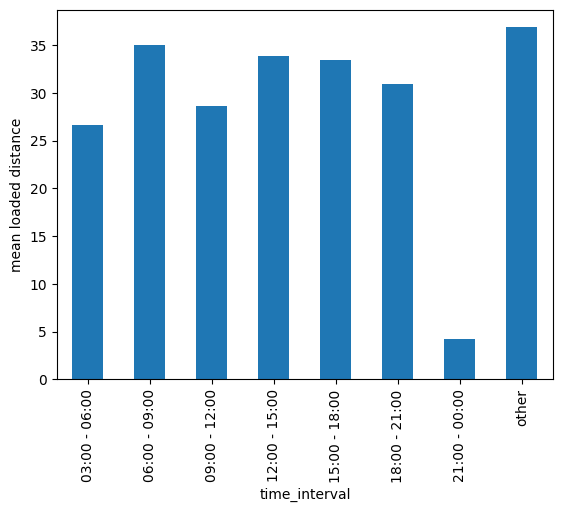

In [56]:
df.groupby('time_interval')['loaded_distance'].mean().plot(kind='bar', ylabel='mean loaded distance')

In [30]:
def AMPM_time(time):
    if time == 'AM':
        return 'AM'
    if time == 'PM':
        return 'PM'
    if len(time.split(':')) != 2:
        return np.NaN
    if '00:00' <= time < '12:00':
        return 'AM'
    if '12:00' <= time < '24:00':
        return 'PM'
df['AMPM'] = df.appt_time.astype(str).apply(AMPM_time)

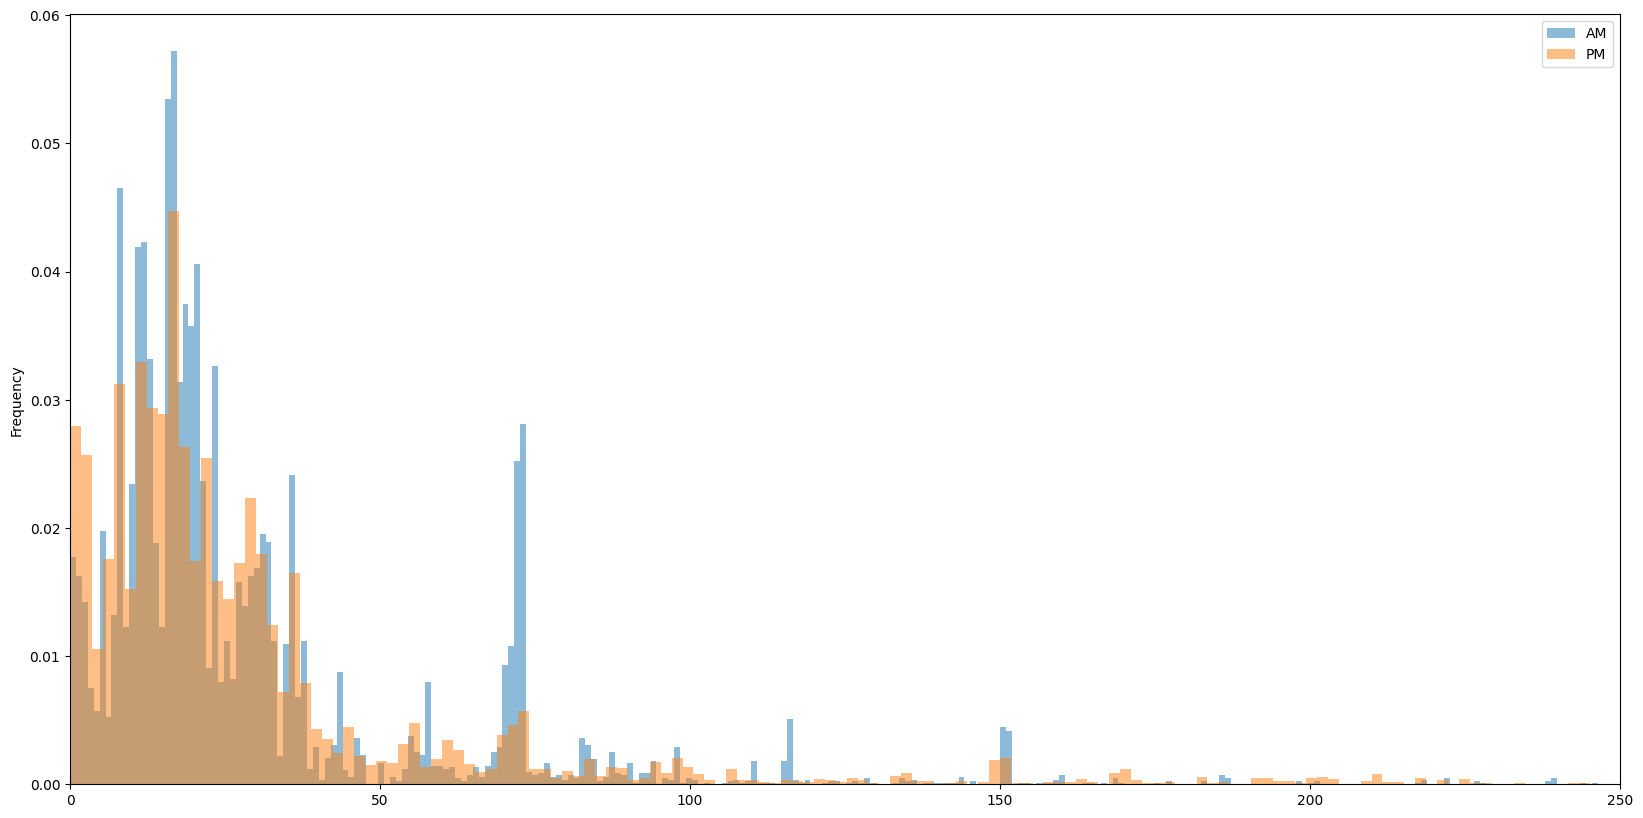

In [50]:
# Distribution of loaded_distance according to AM/PM of a day
df.groupby('AMPM')['loaded_distance'].plot(alpha=0.5,kind='hist', bins=1500, xlim=(0, 250), legend=True, xlabel='loaded_distance', ylabel='Counts of rides', figsize=(20, 10), density=True);

- The purpose of the above plots is to find if loaded distances are related to the time period within a day

In [51]:
df['origin'] = pd.Series(zip(df.origin_lat, df.origin_lng))
df['destination'] = pd.Series(zip(df.destination_lat, df.destination_lng))
df = df.drop(['origin_lat', 'origin_lng', 'destination_lat', 'destination_lng'], axis=1)
df.head()

,id,loaded_distance,appt_date,appt_time,client_id,driver_id,program_name,time_interval,AMPM,origin,destination
0,716463,22.4,2022-11-01,15:00,4844,14,STP,15:00 - 18:00,PM,"(44.22, -75.8)","(43.96, -75.91)"
1,716464,9.0,2022-11-01,20:00,7874,345,SRVC,18:00 - 21:00,PM,"(43.97, -75.93)","(44.08, -75.93)"
2,716465,42.0,2022-11-01,13:00,16123,163,SRVC,12:00 - 15:00,PM,"(43.61, -75.36)","(43.98, -75.92)"
3,716466,17.4,2022-11-01,09:30,9853,1124,SRVC,09:00 - 12:00,AM,"(44.15, -75.71)","(43.98, -75.92)"
4,716467,17.4,2022-11-01,09:30,15320,1124,SRVC,09:00 - 12:00,AM,"(44.15, -75.71)","(43.98, -75.92)"


In [52]:
# The number of occurrances of each pick-up place
df.origin.value_counts()

(43.98, -75.92)    1874
(43.95, -75.91)     591
(44.6, -75.15)      419
(44.69, -75.5)      344
(43.32, -76.44)     326
                   ... 
(43.33, -76.1)        1
(44.19, -75.96)       1
(38.93, -94.77)       1
(43.08, -76.18)       1
(44.01, -75.9)        1
Name: origin, Length: 1079, dtype: int64

In [63]:
# The number of occurrances of each destination
df.destination.value_counts()

(43.98, -75.92)    1837
(43.95, -75.91)     580
(44.6, -75.15)      413
(44.69, -75.5)      326
(43.32, -76.44)     312
                   ... 
(43.71, -75.28)       1
(44.61, -75.16)       1
(40.74, -74.01)       1
(43.42, -76.14)       1
(44.69, -74.75)       1
Name: destination, Length: 1084, dtype: int64

In [64]:
df[df.appt_date =='2022-11-01'].client_id.value_counts()

3659     4
14630    4
1818     4
1910     4
16399    4
        ..
16031    1
14466    1
18763    1
14969    1
17259    1
Name: client_id, Length: 343, dtype: int64